# Principle Component Analysis

Last week we saw how classification algorithms can become very computationally intensive for large or higher dimensional datasets. Principle component analysis allows us to reduce the dimension of our dataset by finding the *principle components* - that is, the set of orthogonal (at right angles) vectors that minimises the sum of the errors of the points from these components.

Let's look at a a quick example in 2D to see what's going on:

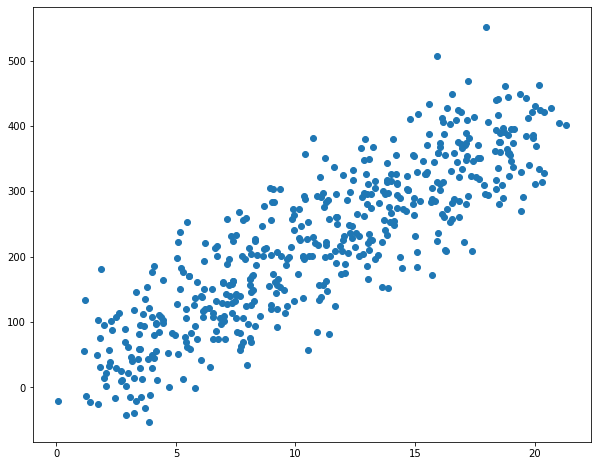

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_samples = 500

# Generate random data
x = np.linspace(2, 20, n_samples) + np.random.randn(n_samples)
y = x * 20 + (np.random.randn(n_samples) * 60)

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y)
plt.show()

We can see that our data is linearly correlated, and could probably draw the principle components ourselves - the first being the line of best fit and the second being the orthogonal line in the middle of the line of best fit. Let's take a look at how PCA does it:

In [ ]:
from sklearn.preprocessing import StandardScaler

data = np.array(list(zip(x, y)))

# It is CRUCIAL that we normalise our data for PCA because we want each feature
# to have an equal weighting.

scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

pca = PCA(n_components=2)
pca.fit(data)

# These two objects are the principle component vectors, and the variance the 
# vectors "explain" over the data - that is the "dual" problem to minimising
# the sum of error to the data.
print(pca.components_, pca.explained_variance_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] [1.86826497 0.13574305]


Now we can make 2 new plots - the plot as above with the principle components overlayed, then the data transformed to it's principle components.

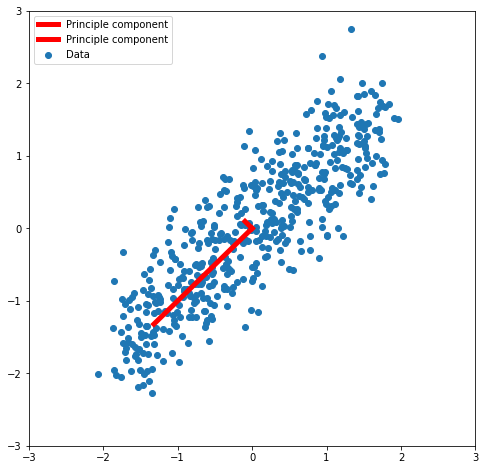

In [ ]:
# Plot data
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(data[:, 0], data[:, 1], label="Data")

# Create vectors for PCs
for component, variance in zip(pca.components_, pca.explained_variance_):
    scaled_component = component * variance

    ax.plot([0, scaled_component[0]], 
            [0, scaled_component[1]], 
            c='red', 
            lw=5, 
            label="Principle component")

ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
ax.legend()
plt.show()

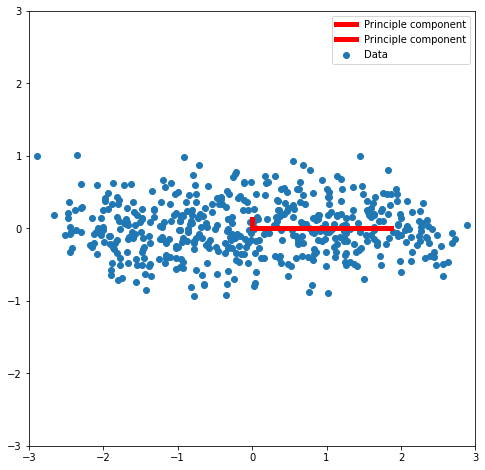

In [ ]:
# Plot new data


scaled_data = pca.transform(data)
scaled_pcs = pca.transform(pca.components_)

# Plot data
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], label="Data")

for component, variance in zip(scaled_pcs, pca.explained_variance_):
    scaled_component = component * variance

    ax.plot([0, scaled_component[0]], 
            [0, scaled_component[1]], 
            c='red', 
            lw=5, 
            label="Principle component")

ax.set_xlim((-3, 3))
ax.set_ylim((-3, 3))
ax.legend()
plt.show()

So we've transformed our data to an orthogonal axis - for a 2D to 2D it doesn't really make much sense, but for higher dimensions to 2D it can be a lifesaver! Let's look at some 3D data and project it down to 2D using PCA

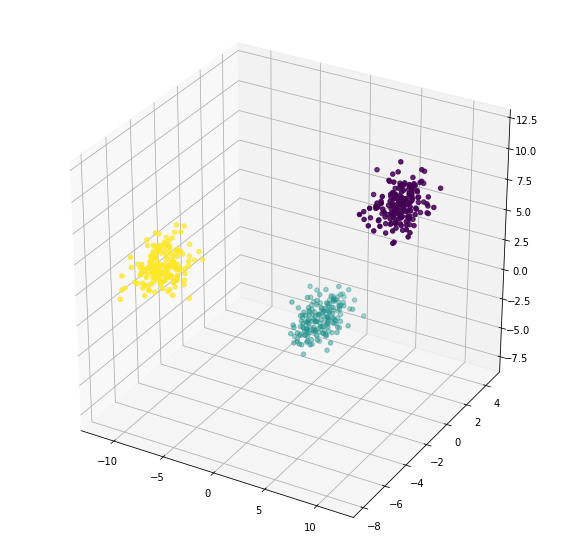

[[55.35824829 13.0417278  19.47791632]
 [13.0417278   9.65928301 -6.94913735]
 [19.47791632 -6.94913735 32.39721335]]


In [ ]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

data = make_blobs(n_samples=500, n_features=3)
points = data[0]
labels = data[1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels)
plt.show()

# Also print the covariance matrix of our data.
# PCA Aims to set the non-diagonal entries to zero, and maximise the top left
# entry.
print(np.cov(points.T))

Ok - now let's try projecting the plots by discarding one of the axis. Doing this is simple - we just scatter plot two of the inputs to the above scatter argument at a time.

[[1.00200401 0.56512039]
 [0.56512039 1.00200401]]


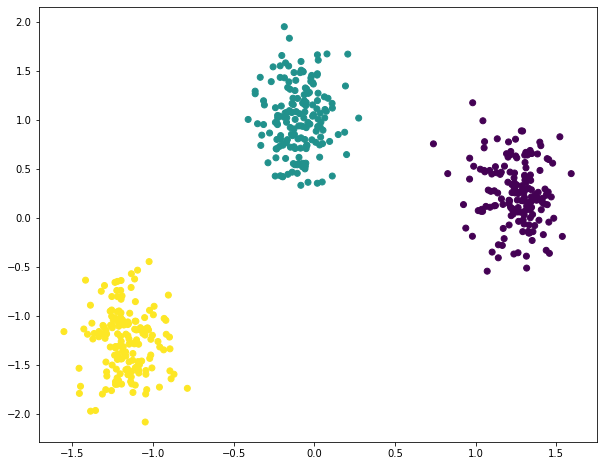

[[ 1.00200401 -0.39361721]
 [-0.39361721  1.00200401]]


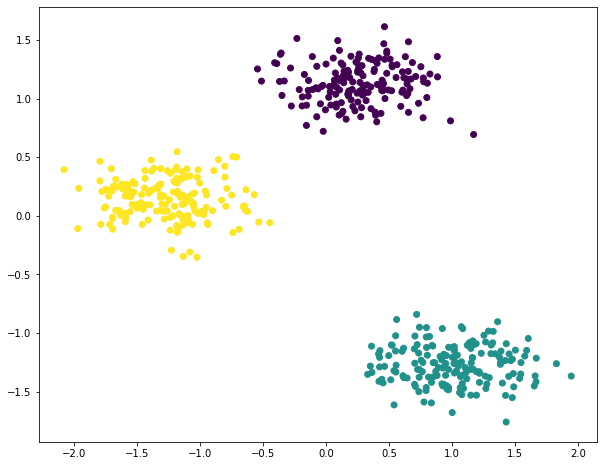

[[1.00200401 0.46085782]
 [0.46085782 1.00200401]]


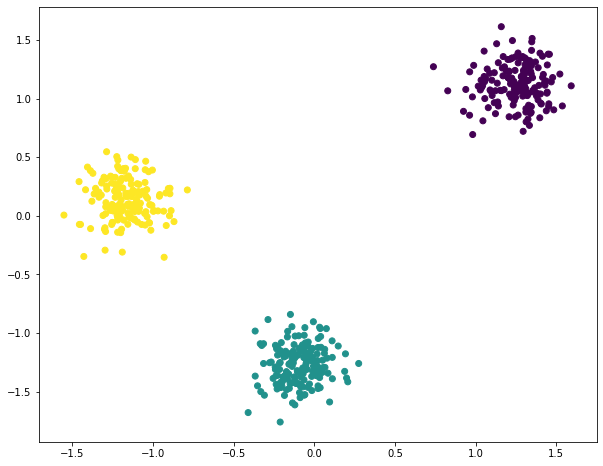

In [ ]:
for a1, a2 in [(0 , 1), (1, 2), (0, 2)]:

    scaler = StandardScaler()
    new_points = scaler.fit_transform(points)


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(new_points[:, a1], new_points[:, a2], c=labels)
    print(np.cov(np.array([new_points[:, a1], new_points[:, a2]])))
    plt.show()

These would all be alright for clustering - but let's look at the projection to 2D using a PCA fit:

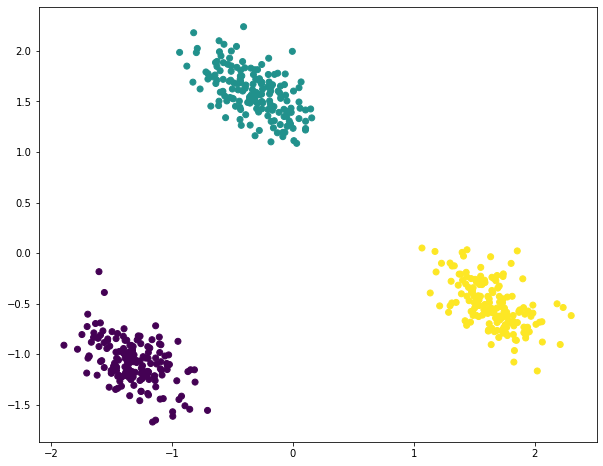

[[ 1.57603978e+00 -8.54360003e-17]
 [-8.54360003e-17  1.37797005e+00]]


In [ ]:
scaler= StandardScaler()
scaler.fit(points)
new_points = scaler.transform(points)

pca = PCA(n_components=2)
pca.fit(new_points)
pca_points = pca.transform(new_points)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_points[:, 0], pca_points[:, 1], c=labels)
plt.show()

print(np.cov(pca_points.T))


Again this might not be too impressive - but let's look at one last extreme example that might show the power of PCA: 10 features

In [ ]:
data = make_blobs(n_samples=500, n_features=10, centers=5)
points_2 = data[0]
labels_2 = data[1]

There is no way of visualising this as normal (good luck making a 10 dimensional visualisation!) - and there are no good ways of getting all the projections and choosing the best one by hand for 10 features you'd have to go through 45 plots. For 100 it would be 4950! So we are forced to use PCA "blindly"!

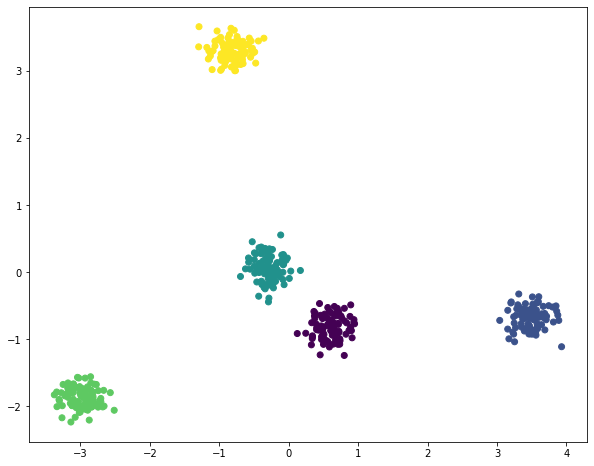

In [ ]:
scaler= StandardScaler()
scaler.fit(points_2)
new_points = scaler.transform(points_2)

pca = PCA(n_components=2)
pca.fit(new_points)
pca_points = pca.transform(new_points)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_points[:, 0], pca_points[:, 1], c=labels_2)
plt.show()

So we have our reduction - and can use this for clustering/classification as before, but with the ability to visualise what's going on - and at a *far* faster speed. One common post-model task for PCA is to find the distribution of variance amongst the PCs, and which features are most important to which PC. There are actually stored in the `pca.explained_variance_ratio_` and `pca.components_` attributes respectively, but need some interpretation:

In [ ]:
print('Variance Ratios')
print(pca.explained_variance_ratio_)

print('\n')
# Abs here to force negative to positive

print("Component breakdown")
print(abs(pca.components_))

Variance Ratios
[0.44693643 0.31274863]


Component breakdown
[[0.39114821 0.08941869 0.43025527 0.37464708 0.20029053 0.36226346
  0.33104255 0.13907276 0.45267915 0.09125467]
 [0.23715983 0.49340423 0.08328274 0.00326303 0.06773642 0.28522131
  0.29838167 0.51490759 0.06288578 0.49930485]]


Here we can see thta 44.7% of the variance in the data can be explained with the first PC. Then 31.3% by the second - note this would never total 100% - if it did it would mean that our data would have a perfect "x" shape!

The components show the "importance" of each feature to each PC. From looking at the numbers we can see that feature 9 (0.4527) contributes the most to PC1. Then feature 8 (0.5149) contributes the most to PC2.

# Regression (or "the key to ML success"!)

We have seen statistical linear regression before - and `scikit_learn` has access to a lot of linear models in the `.fit()` and `.predict()` methods we know and love. We're not going to talk about this, but instead focus on a very common technique in ML/AI which I'm going to call "reframing the question". You may have noticed that on the `scikit_learn` website the list of methods for classification looks very similar to that of regression...

![Scikit](https://i.imgur.com/npr9m1K.png)

Why? And more importantly... how?!?! If we have no classes for our data, how can we use the kNN algorithm? Well - like with SVM kernels and PCA, the key is in being flexible with our dimensions - for a simple 1D regression, we have (x, y) points and want to fit a line. Well, how about instead of treating out (x, y) points as the points to our algorithm, we treat the x points as the inputs, and the y points as the labels? Since our labels are now on a continuous dimension instead of discrete (0, 1, 2), we can take the mean of the k nearest neighbours instead of just the "most popular label". Let's take a look at an example: 

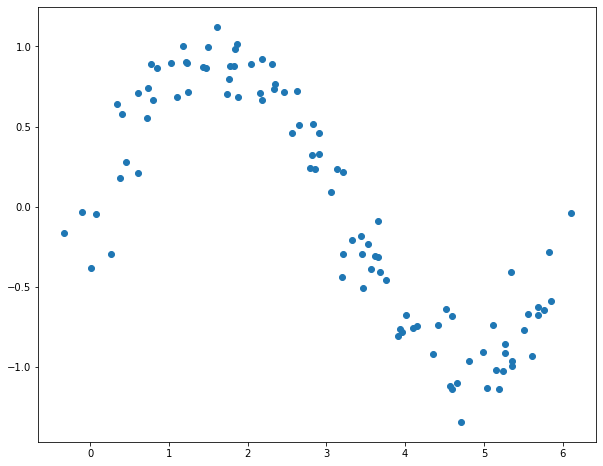

In [ ]:
# Let's create a noisy sine wave.
x = np.linspace(0, 6, 101) + np.random.randn(101) / 5
y = np.sin(x) + np.random.randn(101) / 5

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)


This is a nonlinear relation - and without knowing the underlying pattern would be quite difficult to come up with a linear model for it (you could try fitting a linear model for $y = a sin(x) + c$ if you noticed the $sin(x)$ term, but obviously this is not always clear! Let's try using a KNN model for this set, using the y values as classes and the x as the inital points.

Just to hit this home - we are building a *one dimensional* model now - we are used to expanding up to 3D, or projecting down to 2D. But now we are working with 1D!

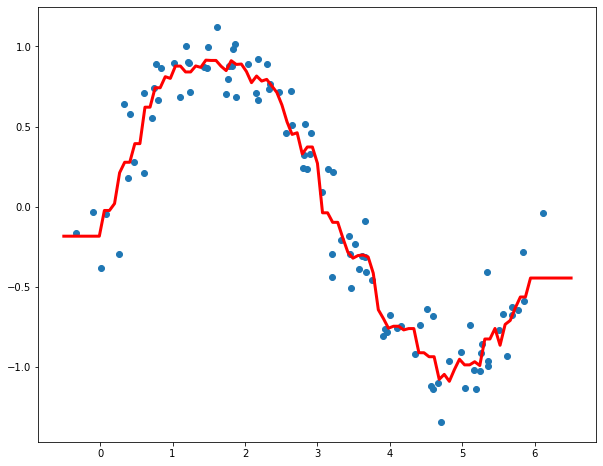

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

# sklearn will shout at us unless we do the following line. The error is VERY VERY 
# common - so learn how to deal with it!

x_reshaped = x.reshape(-1, 1)
knn.fit(x_reshaped, y)

# Let's predict outside the initial range a bit to see how extrapolation works
x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict = knn.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict, c='red', lw=3)

plt.show()

Ok - not bad! By default, the KNN algorithm here will assign uniform weights to each point - but we can change this to weight the mean based on the distance to each point. This gives a different looking curve - most notably in the extrapolation areas (-0.5 to 0 and 6 to 6.5!)

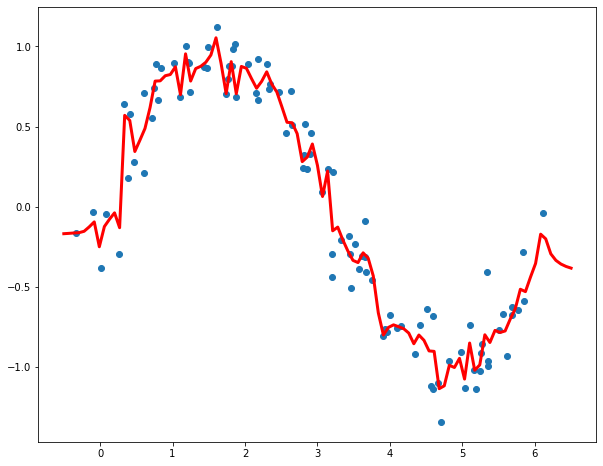

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

# sklearn will shout at us unless we do the following line. The error is VERY VERY 
# common - so learn how to deal with it!

x_reshaped = x.reshape(-1, 1)
knn.fit(x_reshaped, y)

# Let's predict outside the initial range a bit to see how extrapolation works
x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict = knn.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict, c='red', lw=3)

plt.show()

In fact, SVR (which is just SVM but used for regression), is extremely similar to our normal linear regression when using a linear kernel - both are trying to *minimise* the distance from the points to our regression line.

Finally, let's look at a decision tree's response to the above problem:

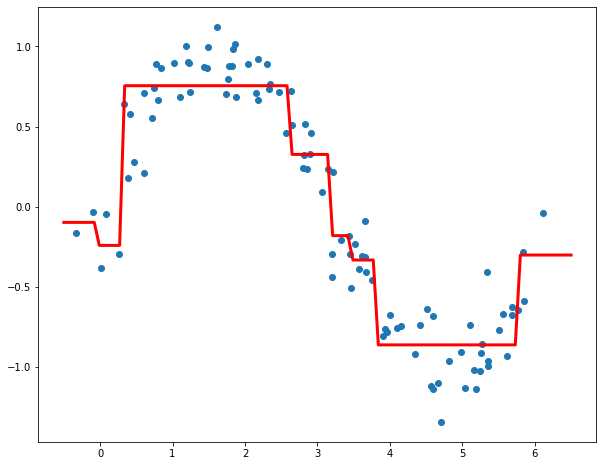

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(x_reshaped, y)

x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict = dt.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict, c='red', lw=3)

plt.show()

Let's look at the tree to see how the decision making process happens:

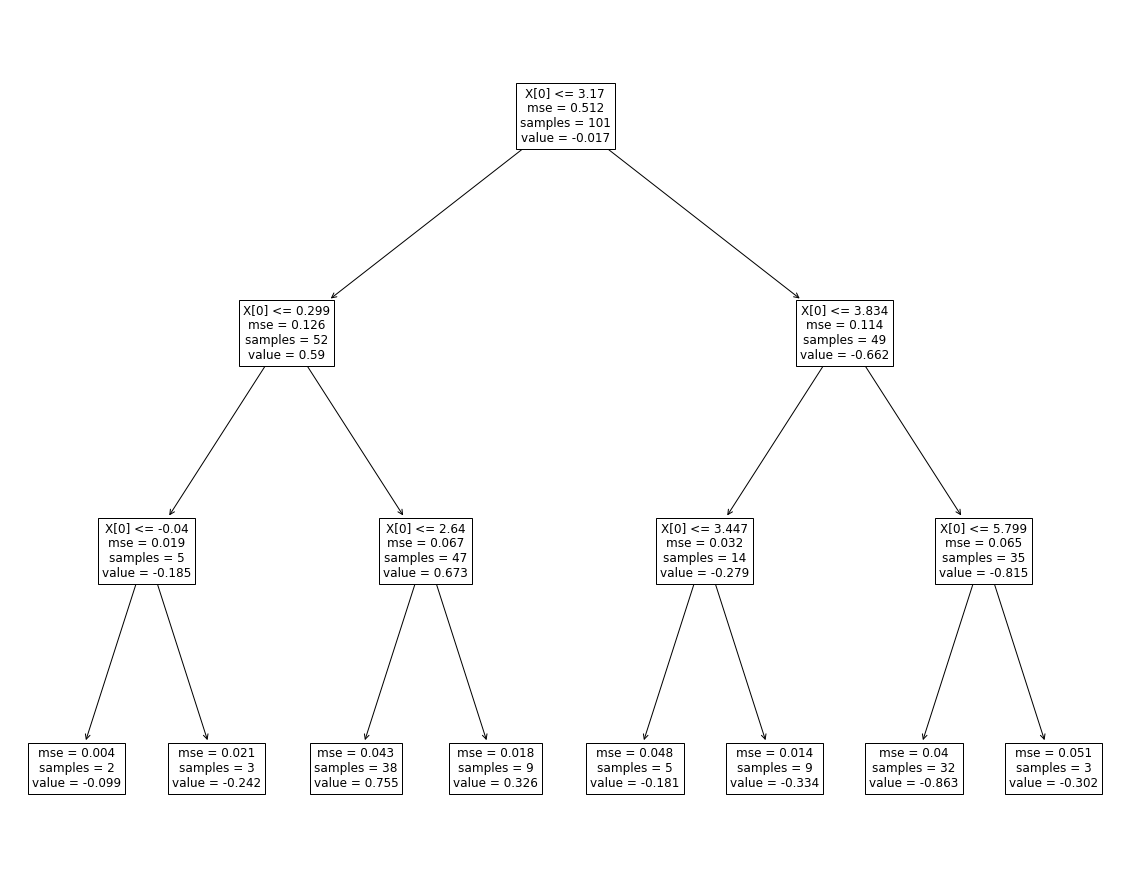

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
plot_tree(dt, ax=ax, fontsize=12)
plt.show()

# Ensemble Models

For our last segment on "shallow learning" - that is, ML models that aren't deep learning, let's look at ensemble models. Ensemble models are clever ways of combining models to get better results - commonly this is done by combining a number of classifiers and combining their output somehow to give an answer. This often allows us to build overall models more robust to outliers, and generally more accurate. In general we have 2 types of ensembling methods:

* Aggregation, where a number of independent models come together to give an averaged prediction by way of consensus. Very often these independent models will have a "bootstrapped" dataset - a very common statistical technique that involves resampling a dataset with replacement. For example, if our dataset was the numbers 1 through 20, a bootstrapped sample might be (1, 2, 5, 5, 17, 4).

* Boosting, where we iteratively improve an ensemble model by adding new models based on the performance of previous models. How this is done is important, and tricky. AdaBoost does it by iteratively training new models by changing the weights of each data point. Gradient boosting does this by training new models on the errors of the sum of previous models, but incorporating a learning rate to reduce overfitting.

All of these methods are under the `sklearn.ensemble` sublibrary, which helpfully abstracts a lot of the hard work away - if you are confident with what we've done so far I would take a look, since understanding the algorithm is very helpful to diagnosing problems - but this is pretty advanced stuff, and a bit beyond the scope of the course. These "sum of shallow learning" models are (at the moment) state of the art, and the main competitor to deep learning models!

# Activity 1.1

Remember when we were projecting the `iris` dataset onto two dimensions and using a clustering/classification algorithm there? Compare (or compute!) those results with the same chosen algorithm used after reducing the dataset to 2 dimensions using PCA instead of just two of the features.

In [1]:
!wget 'https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv'

--2021-06-08 15:51:03--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4351 (4.2K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.25K  --.-KB/s    in 0s      

2021-06-08 15:51:04 (60.4 MB/s) - ‘iris.csv’ saved [4351/4351]



# Activity 1.2

PCA is often used to visualise data, but it is also important for reducing datasets with a lot of features to a reasonable dimension size, while still explaining the majority of the variance. It is very common to use PCA to reduce the number of dimensions in a dataset to the point where 95 or 99% of the variance is accounted for. Import the `lots_of_features.csv` dataset and find how many principle components are needed to explain 95 and 99% of the variance respectively. There are multiple ways to do this - graphically or programatically!

In [2]:
!wget 'https://raw.githubusercontent.com/stmball/PracticalPython/main/Dimension%20Reduction%2C%20Regression%20and%20Ensemble%20Models/lots_of_features.csv'

--2021-06-08 15:51:24--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Dimension%20Reduction%2C%20Regression%20and%20Ensemble%20Models/lots_of_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 961530 (939K) [text/plain]
Saving to: ‘lots_of_features.csv’

lots_of_features.cs 100%[===================>] 938.99K  --.-KB/s    in 0.04s   

2021-06-08 15:51:24 (24.7 MB/s) - ‘lots_of_features.csv’ saved [961530/961530]



# Activity 2.1

We have seen the regression models for KNN and SVM. Complete the following tasks:

* Using a sensible metric, and model validation techniques, compare the performance of a kNN and Decision Tree model as above on the noisy sine wave dataset.
* Then, using a support vector regression model, create a new regression model for the above data.
* Consider using different kernels for the model above. You should be able to get a very nice model this way!

# Activity 2.2 [LONG]

The `parking` dataset (https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#) describes the car parking availability for different car parks in Birmingham city center, in the winter of 2016. Birmingham city council wants you to build a model to predict the parking spaces available for the holiday season this year, using a machine learning model.

* Download and import the dataset into Colab
* Graph the number of parking spaces available in the Bull Ring carpark over time.
* Build multiple regression models for the above data, performing a train-test-split to show you model's efficacy. Which model was the strongest?
* This data was only for a short period of time in winter - can you think of how this model could be extended to all year round?

